## Parte 1 da Entrega do Projeto de Mineração de Dados
 
 - Leitura dos áudios;
 - Processamento através de MEL-frequency Ceptral Coeficients;
 - Amostragem e plotagem das frequências em gráfico comparativo.
 

In [26]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, validation_curve

def label_audio(filepath, filename):
    try:
        data, fs = librosa.load(filepath, None)
        librosa.display.waveplot(data, sr=fs)
        hop_length = 512
        mfcc = librosa.feature.mfcc(data,  sr=fs, hop_length=hop_length, n_mfcc=40)
    
        feature = np.mean(mfcc.T, axis=0)
         
    except Exception as e:
        print("Error on processing file: ", filename)
        return None, None

    label = filename.split('.wav')[0]
    
    return [feature, label]

def label_to_list(label):
    return np.array(list(label))
        
def feature_to_list(feature):
    return np.array(feature.tolist())

### Busca dos arquivos
 - Listagem dos dados de treino e validação;
 - Output do gráfico após a função de processamento de todos os áudios.

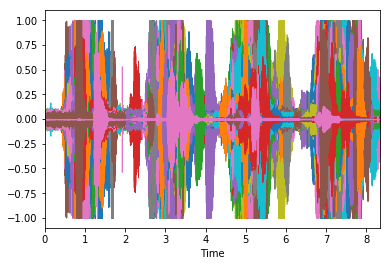

In [28]:
train_folder = 'base_treinamento_I'
train_path = os.path.abspath(train_folder)

validation_folder = 'base_validacao_I'
validation_path = os.path.abspath(validation_folder)

X_train = list()
Y_train = list()

X_val = list()
Y_val = list()

for root, dirs, filenames in os.walk(train_path):
    for f in filenames:
        feature, label = label_audio('{0}/{1}'.format(train_path, f), f)
        X_train.extend(np.split(feature_to_list(feature),4))
        Y_train.extend(label_to_list(label))

for root, dirs, filenames in os.walk(validation_path):
    for f in filenames:
        feature, label = label_audio('{0}/{1}'.format(validation_path, f), f)
        X_val.extend(np.split(feature_to_list(feature),4))
        Y_val.extend(label_to_list(label))
        

### Treino da rede neural

- A rede é treinada com a base, iterando entre cada arquivo de áudio com seus respectivos labels extraídos do nome do arquivo;
- É feito o cross validation com o score e com shuffle split.

In [ ]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 1), random_state=1)

mlp.fit(X_train, Y_train)
score = mlp.score(X_train,Y_train)        

mlp.score(X_train[212:], X_val)


### Gráficos dos resultados

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC

scores_train, scores_test = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=1,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(scores_train, axis=1)
train_scores_std = np.std(scores_train, axis=1)
test_scores_mean = np.mean(scores_test, axis=1)
test_scores_std = np.std(scores_test, axis=1)

plt.title("Curva ")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, 
             train_scores_mean, 
             label="Training score",
             color="darkorange", 
             lw=lw)
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2,
                 color="darkorange", 
                 lw=lw)
plt.semilogx(param_range, 
             test_scores_mean, 
             label="Cross-validation score",
             color="navy", 
             lw=lw)
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2,
                 color="navy", 
                 lw=lw)

plt.legend(loc="best")
plt.show()